# Create a random baseline for species prediction
Here we create a random prediction based on the species distribution in the data

## Imports

In [1]:
import pandas as pd
import numpy as np
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sb
from datasets import Dataset
from datasets import load_from_disk
import os


## Load data

In [22]:
data_path = os.path.join("..","data","train_val")

absolute_path = os.path.abspath(data_path)

print(absolute_path)

C:\Users\49176\Unistuff\PP2\prostT5-CLIP\data\train_val


In [28]:
dataset = load_from_disk(absolute_path)

In [29]:
dataset

DatasetDict({
    train: Dataset({
        features: ['identifier', 'sequence', 'species'],
        num_rows: 113796
    })
    test: Dataset({
        features: ['identifier', 'sequence', 'species'],
        num_rows: 28450
    })
})

## Create random precitions for test respecting the distribution of training data

In [30]:
len(dataset["test"])

28450

In [36]:
train_labels = dataset['train']['species']

# Calculate label distribution
unique_labels, counts = np.unique(train_labels, return_counts=True)
probabilities = counts / counts.sum()

# Randomly sample labels based on the distribution
num_samples = len(dataset["test"])  # Change this to however many samples you want
sampled_labels = np.random.choice(unique_labels, size=num_samples, p=probabilities)

# Print the sampled labels
print(sampled_labels)

['Scutigera coleoptrata' 'Homo sapiens' 'Homo sapiens' ...
 'Trypanosoma brucei brucei ' 'Arabidopsis thaliana' 'Rattus norvegicus']


### Check if distribution is respected

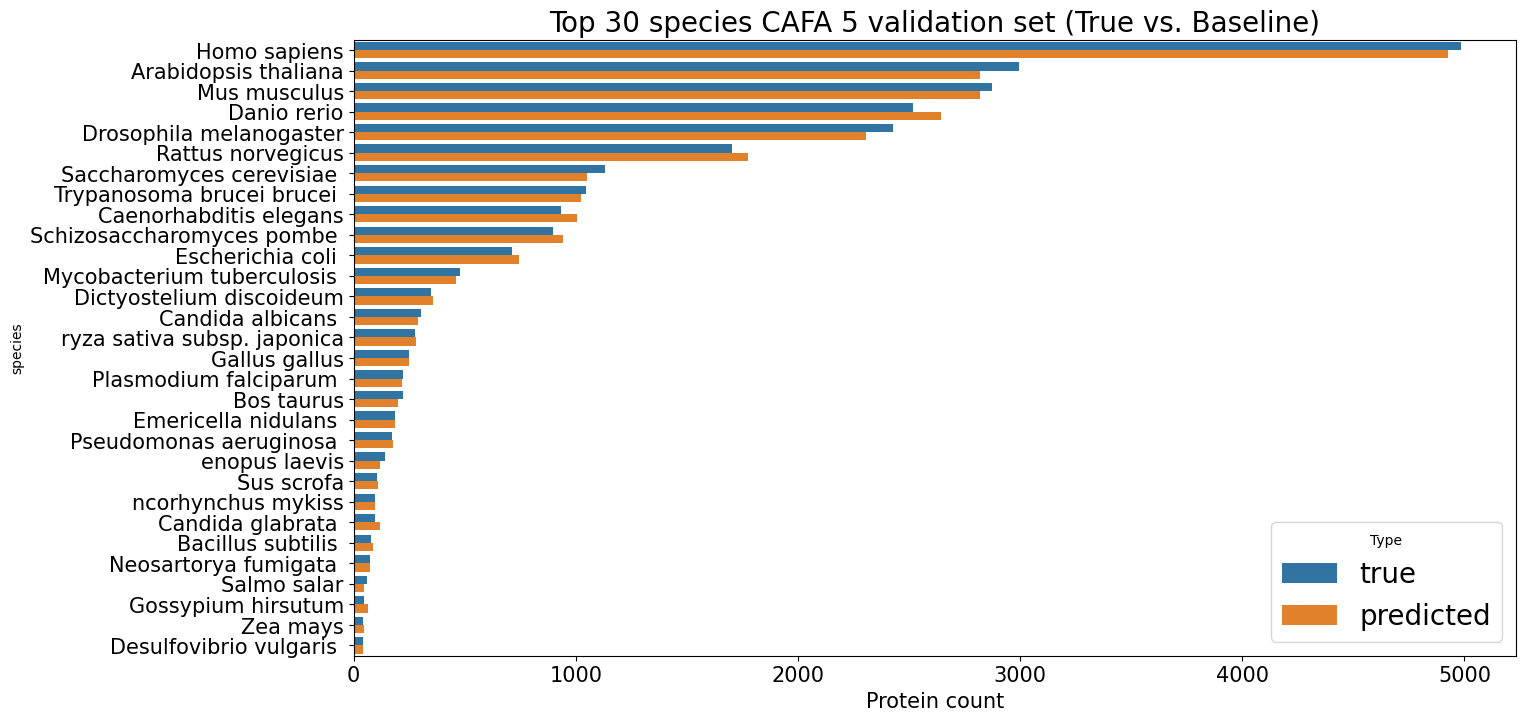

In [45]:
# Assuming 'species' is a list of labels in the 'train' and 'test' splits
test_species = dataset['test']['species']

# Convert test species list to pandas Series and calculate value counts
species_counts_real = pd.Series(test_species).value_counts().reset_index()
species_counts_real.columns = ['species', 'count']
species_counts_real['type'] = 'true'

# Convert sampled labels list to pandas Series and calculate value counts
species_counts_pred = pd.Series(sampled_labels).value_counts().reset_index()
species_counts_pred.columns = ['species', 'count']
species_counts_pred['type'] = 'predicted'

# Combine both real and predicted counts into one DataFrame
species_counts_combined = pd.concat([species_counts_real, species_counts_pred])

# Filter to include only the top 30 species based on true counts
top_species = species_counts_real['species'].iloc[:30]  # Top 30 species from the real counts
species_counts_combined = species_counts_combined[species_counts_combined['species'].isin(top_species)]

# Plot the bar plot with hue for real and predicted
plt.figure(figsize=(15, 8))
sb.barplot(data=species_counts_combined, y='species', x='count', hue='type', orient="h")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("Protein count", fontsize=15)
plt.title("Top 30 species CAFA 5 validation set (True vs. Baseline)", fontsize=20)
plt.legend(title="Type",fontsize=20)
plt.show()


## Save data

In [46]:
data_path = os.path.join("..","data","val_baseline")

absolute_path = os.path.abspath(data_path)

print(absolute_path)

# Add the 'baseline' column with the sampled predictions to the test set
dataset['test'] = dataset['test'].add_column("baseline", sampled_labels)

# Save the updated dataset with the new baseline predictions
dataset["test"].save_to_disk(absolute_path)

# Verify that the column was added
print(dataset['test'])

C:\Users\49176\Unistuff\PP2\prostT5-CLIP\data\val_baseline


Saving the dataset (0/1 shards):   0%|          | 0/28450 [00:00<?, ? examples/s]

Dataset({
    features: ['identifier', 'sequence', 'species', 'baseline'],
    num_rows: 28450
})


NameError: name 'bootstrap_evaluate' is not defined